# Lab 1
Authors: Jeffrey Taylor, Austin Hayden, Eric Bernard, Riley Galante

# Business Understanding
This data can be useful in identifying trends in popular YouTube videos with the goal of predicting whether a particular video will be popular or not. 
Coming from the dataset’s description, “YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.”
The important thing to note here is that there are many different factors used to determine the popularity of a video, and it is not solely determined by the number of views. By analyzing the dataset and looking at trends, we can determine what factors affect how popular a YouTube video will be. Once we know which factors to look at, we will be able to predict whether future videos will end up trending or not. 
The data presented in this dataset was collected using the YouTube API and includes several months of data on daily trending YouTube videos. Data is included and separated by region with up to 200 listed trending videos per day although we are only interested in and will be looking at the data pertaining to the US. Some features of the data include, video title, channel title, publish time, tags, views, likes, dislikes, description, and comment count. The data also includes a category_id feature that has a corresponding file reveling the category each ID is associated with. 

# Third-Party Interest
The end goal of analyzing this dataset is to determine whether a video that is uploaded to YouTube will end up trending or not. Having a prediction algorithm such as this one would be of interest to many advertising agencies or departments. According to YouTube’s Advertising service (https://www.youtube.com/intl/en_us/ads/), viewers are 2x more likely to buy something they saw on YouTube and 4x more likely to use YouTube over any other platform to find information about a brand product or service. Also, over 70% of viewers say that YouTube makes them more aware of new brands. With that being said, YouTube is a great platform to use to get people interested and more aware of your product or service. However, an ad campaign can achieve much greater success reaching more people by possessing knowledge of a video’s trend ability. Advertisers will want to associate their advertisement with videos that are predicted to trend.

# Measure of Success
Obviously, the most desirable rate of success for our prediction algorithm would be 100%. However, we believe this algorithm would still be of use to advertisers even with a lower rate of success. We also want our rate of success to be greater than 50% because if we have a success rate of 50% or lower, our prediction algorithm would be no better at predicting a video to be popular or not than flipping a coin would. We think that if we can achieve a success rate of 80% or greater, advertisers would find this algorithm to be very useful. 
Furthermore, we want to limit the number of false positives to be as close to zero as possible. If our algorithm produces a lot of false positives, advertisers will begin to lose money on failed advertising campaigns. Also, we want false negatives to be as minimal as possible but are more acceptable than a false positive because no one will waste any money or resources on the video it will only be a missed opportunity. 

Dataset source: https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv


# Load YouTube Dataset and prepare it for visualizing

In [2]:
# loading dataset
# basically following the example
import pandas as pd
import numpy as np

df =  pd.read_csv('https://raw.githubusercontent.com/jenyintaylor/MLiP_Group/master/Lab%201/data/USvideos.csv')

df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Data Understanding

Most of the automatically assigned data types by Pandas make a large amount of sense. You have any of the text-based informational data points such as dates, titles, and categories. These pieces of data can be used for determining other information about the videos other than popularity. There are also some information points that are boolean terms to tell you other information such as comments and ratings being disabled, as well as a datapoint telling you if the video is actually able to be accessed anymore. You finally have the information such as views, likes, dislikes, and comment count that are all purely numerical and heavily associated with the popularity of the video by what is known of Youtube's popularity algorithm. The most confusing data type in the data set is category_id, as a number (specifically int) due to the fact that it is hard for a human being to see these numbers and instinctively know what number equates to a certain category. Thankfully the creators of the dataset also provided a json file that will allow you to map from the integer form of the id to the string of it for people to use later on in analysis.
## Questions to consider...
    What is the general public opinion of trending videos? (likes vs dislikes)
    Average number of comments?
    How many trending videos end up getting deleted
    
    Which category of video trends the most?

In [4]:
# Percentage of videos with more likes than dislikes

sum(df.likes>=df.dislikes)/len(df)*100

# with this, we can focus on engagement

98.59337224352242

In [5]:
# group by categories

df_g = df.groupby(by='category_id')
df_list = []

for x,y in df_g:
    print('In 2018, there were',len(y),'trending',x,'videos.')

In 2018, there were 2345 trending 1 videos.
In 2018, there were 384 trending 2 videos.
In 2018, there were 6472 trending 10 videos.
In 2018, there were 920 trending 15 videos.
In 2018, there were 2174 trending 17 videos.
In 2018, there were 402 trending 19 videos.
In 2018, there were 817 trending 20 videos.
In 2018, there were 3210 trending 22 videos.
In 2018, there were 3457 trending 23 videos.
In 2018, there were 9964 trending 24 videos.
In 2018, there were 2487 trending 25 videos.
In 2018, there were 4146 trending 26 videos.
In 2018, there were 1656 trending 27 videos.
In 2018, there were 2401 trending 28 videos.
In 2018, there were 57 trending 29 videos.
In 2018, there were 57 trending 43 videos.


## Cleaning the Dataset
    

## Visualizing the Data

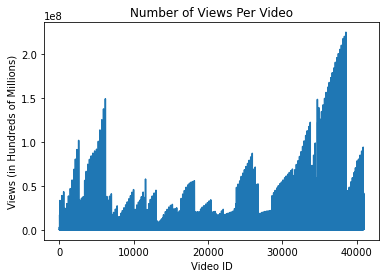

In [6]:
# determine if number of views is most correlated with the success of a trending video

import matplotlib.pyplot as plt

# assign x values which represent each trending video
x_values = []
for x in range(40949):
    x_values.append(x+1)

plt.plot(x_values, df.views)
plt.title('Number of Views Per Video')
plt.xlabel('Video ID')
plt.ylabel('Views (in Hundreds of Millions)')

plt.show()

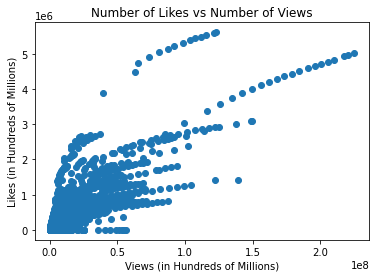

In [7]:
# determine potential correlation between views and likes on a trending video

plt.scatter(df.views, df.likes)
plt.title('Number of Likes vs Number of Views')
plt.xlabel('Views (in Hundreds of Millions)')
plt.ylabel('Likes (in Hundreds of Millions)')

plt.show()

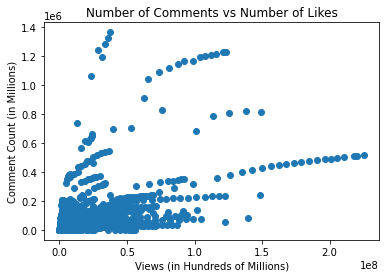

In [8]:
# determine potential correlation between views and comments on a trending video

plt.scatter(df.views, df.comment_count)
plt.title('Number of Comments vs Number of Likes')
plt.xlabel('Views (in Hundreds of Millions)')
plt.ylabel('Comment Count (in Millions)')

plt.show()

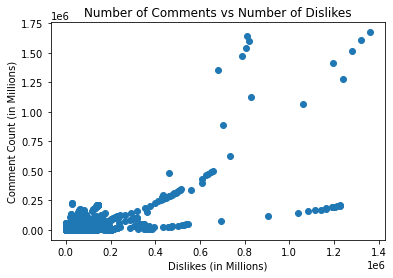

In [10]:
# determine potential correlation between comment count and dislikes on a video

plt.scatter(df.comment_count, df.dislikes)
plt.title('Number of Comments vs Number of Dislikes')
plt.xlabel('Dislikes (in Millions)')
plt.ylabel('Comment Count (in Millions)')

plt.show()

High volume comments and dislikes on a video can be indicative of a controversial video, which is a plausible reason for why a video may have trended. If this relationship existed in high quantities throughout the dataset, we could then begin to assert the idea that videos are more likely to trend because they are controversial, not necessarily because they feature in demand content (i.e. music video, sports highlights, etc.). This graphical analysis shows that a majority of the trending videos have low comment counts and low dislikes, so this controversy theory is therefore most likely not indicative of the popularity of trending videos.